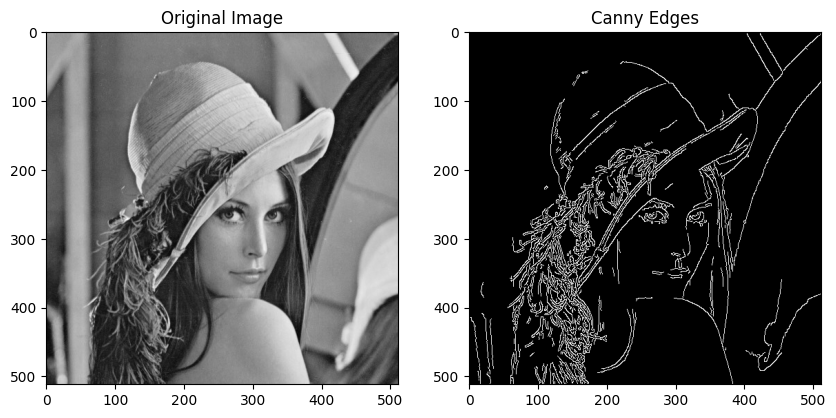

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Image.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection
edges = cv2.Canny(image, 100, 200)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.show()

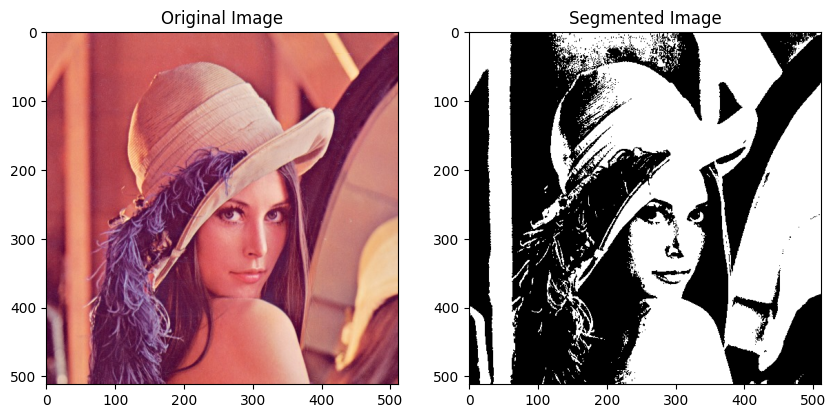

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Image.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Thresholding for segmentation
_, segmented = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(segmented, cmap='gray'), plt.title('Segmented Image')
plt.show()

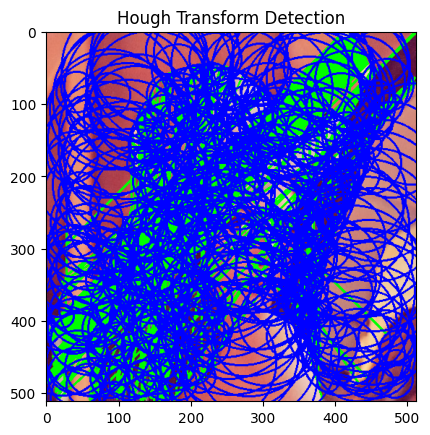

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Image.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges
edges = cv2.Canny(gray, 50, 150)

# Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

# Draw detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform for Circle Detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=10, maxRadius=100)

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

# Display results
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform Detection')
plt.show()


0: 640x640 1 person, 1 umbrella, 235.0ms
Speed: 4.3ms preprocess, 235.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


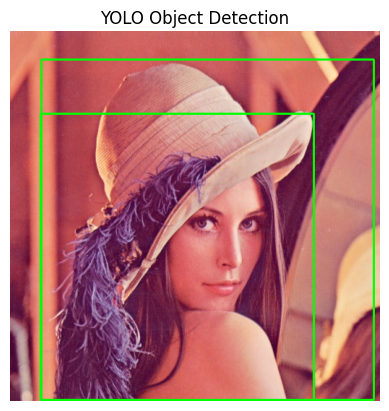

In [ ]:
!pip install ultralytics
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLO model
yolo = YOLO('/content/yolov8n.pt')

# Load image
image_path = '/content/Image.jpeg'
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    raise FileNotFoundError("Error: Image not found. Check the file path.")

# Perform detection
results = yolo(image)

# Access the first result from the list
result = results[0]

# Show results using OpenCV
for box in result.boxes.xyxy:
    x1, y1, x2, y2 = map(int, box[:4])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis("off")
plt.title("YOLO Object Detection")
plt.show()

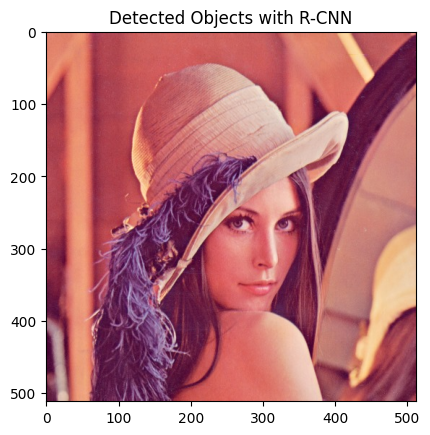

In [ ]:
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load Faster R-CNN Model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and transform image
image_path = '/content/Image.jpeg'
image = Image.open(image_path)
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Perform detection
with torch.no_grad():
    predictions = model(image_tensor)

# Display results
plt.imshow(image)
plt.title('Detected Objects with R-CNN')
plt.show()


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.5MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.01MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.97MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



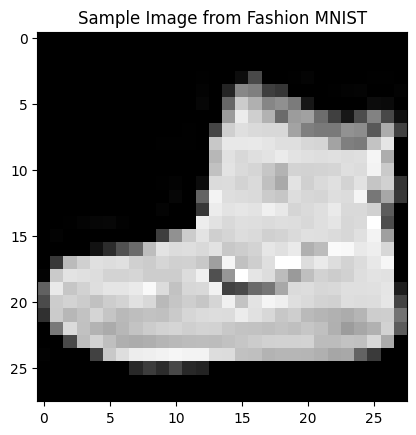

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Display a sample image
plt.imshow(trainset[0][0].squeeze(), cmap='gray')
plt.title('Sample Image from Fashion MNIST')
plt.show()

100%|██████████| 169M/169M [00:01<00:00, 94.1MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


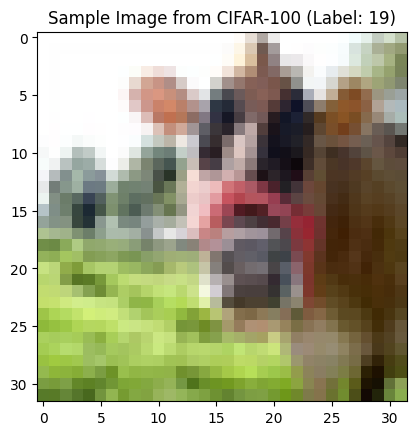

In [ ]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Display a sample image
image, label = trainset[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(f'Sample Image from CIFAR-100 (Label: {label})')
plt.show()